
# Project: Tmdb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

 

### what is the movie that achieved maximum profit?
### what is the number of movies for each year ?
### what are the top ten Movies that achieved profit?
### what are the top ten movie with shorest and longest runtime?
### what are the top ten budget films?
### what are the top ten revenue films? 
### what are the top ten rated Movies?
### what are the top ten popular Movies ?
### top ten directors that directed the most number Movies?
### correlation between popularity and profit?
### average of runtime along time?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01   10% |███▎                            | 1.1MB 27.3MB/s eta 0:00:01    23% |███████▋                        | 2.5MB 29.2MB/s eta 0:00:01    50% |████████████████▏               | 5.3MB 28.2MB/s eta 0:00:01    76% |████████████████████████▌       | 8.0MB 29.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01  4% |█▎                              | 552kB 27.4MB/s eta 0:00:01    63% |████████████████████▍           | 8.5MB 28.2MB/s eta 0:00:01    83% |██████████████████████████▋     | 11.1MB 26.3MB/s eta 0:00:01    92% |█████████████████████████████▋  | 12.4MB 26.7MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unins

<a id='wrangling'></a>
## Data Wrangling


### General Properties¶


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')


### Data Cleaning
 

In [3]:
def checking_data(df):
    print(df.shape)
    print(df.info())

In [4]:
#read the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## check data types

In [5]:
#check data 
checking_data(df)
    

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj   

# Solve duplicated rows¶


## check duplicated rows

In [6]:
#check duplicated rows
df.duplicated().sum()

1

## drop duplicated row

In [7]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

## check null values

In [8]:
#check null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## drop non useful columns¶


In [9]:
#drop the the colums which are not usable in the data analysis process

df.drop(['tagline','keywords','overview','homepage','imdb_id','genres','cast','budget_adj','revenue_adj','production_companies'],axis=1,inplace=True)

## check null values again

In [10]:
#check null values again
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

## check again for duplicated¶


In [11]:
#check data again
checking_data(df)
    

(10865, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 1018.6+ KB
None


# Dealing with null values

## drop null rows

In [12]:
#drop null rows
df.dropna(inplace=True)

In [13]:
#check data again
checking_data(df)
    

(10821, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 11 columns):
id                10821 non-null int64
popularity        10821 non-null float64
budget            10821 non-null int64
revenue           10821 non-null int64
original_title    10821 non-null object
director          10821 non-null object
runtime           10821 non-null int64
release_date      10821 non-null object
vote_count        10821 non-null int64
vote_average      10821 non-null float64
release_year      10821 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 1014.5+ KB
None


## check null values again

In [14]:
#check null values again after cleaning the data
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

## converting release_date to datetime

In [15]:
#convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])


# checking zero values in revenue and budget¶


In [16]:
#check columns that have zero values
df.query('budget == 0 or revenue == 0')

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Bill Condon,103,2015-06-19,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Afonso Poyart,101,2015-09-03,474,6.2,2015
48,265208,2.932340,30000000,0,Wild Card,Simon West,92,2015-01-14,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,James McTeigue,96,2015-05-21,280,5.4,2015
72,284289,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,2015-04-17,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,2015-06-24,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,2015-06-12,569,7.7,2015
88,301875,1.959765,0,2000000,Equals,Drake Doremus,101,2015-09-04,135,5.6,2015
92,370687,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,2015-12-19,11,5.4,2015
93,307663,1.872696,10000000,0,Vice,Brian A Miller,96,2015-01-16,181,4.1,2015


  we cann't replace zeros with mean or median becuse there is huge number of  rows
  
  so we will not do any change 

## making new column profit

In [17]:
#calc profits of the movies
df['profit']=df['revenue']-df['budget']

## Cheking zero runtime

### dealing with zeros runtime replace zeros with the mean of the column 'runtime'

In [18]:
#filling rows that contain runtime of zero with the mean of runtime column
df.replace({'runtime': {0: df.runtime.mean()}}, inplace = True)
df.query('runtime == 0').count()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

In [19]:
#check data again
checking_data(df)

(10821, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 12 columns):
id                10821 non-null int64
popularity        10821 non-null float64
budget            10821 non-null int64
revenue           10821 non-null int64
original_title    10821 non-null object
director          10821 non-null object
runtime           10821 non-null float64
release_date      10821 non-null datetime64[ns]
vote_count        10821 non-null int64
vote_average      10821 non-null float64
release_year      10821 non-null int64
profit            10821 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1.1+ MB
None


<a id='eda'></a>
## Exploratory Data Analysis




In [20]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10821.000000,10821.000000,1.082100e+04,1.082100e+04,10821.000000,10821.000000,10821.000000,10821.000000,1.082100e+04
mean,65722.143055,0.648530,1.468259e+07,3.998782e+07,102.404009,218.211810,5.971509,2001.294890,2.530523e+07
std,91841.687567,1.001704,3.096345e+07,1.172186e+08,30.415387,576.672383,0.933671,12.819687,9.677375e+07
min,5.000000,0.000188,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,10578.000000,0.209036,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00
50%,20533.000000,0.385121,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00
75%,74998.000000,0.716336,1.500000e+07,2.433232e+07,111.000000,146.000000,6.600000,2011.000000,9.401952e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09


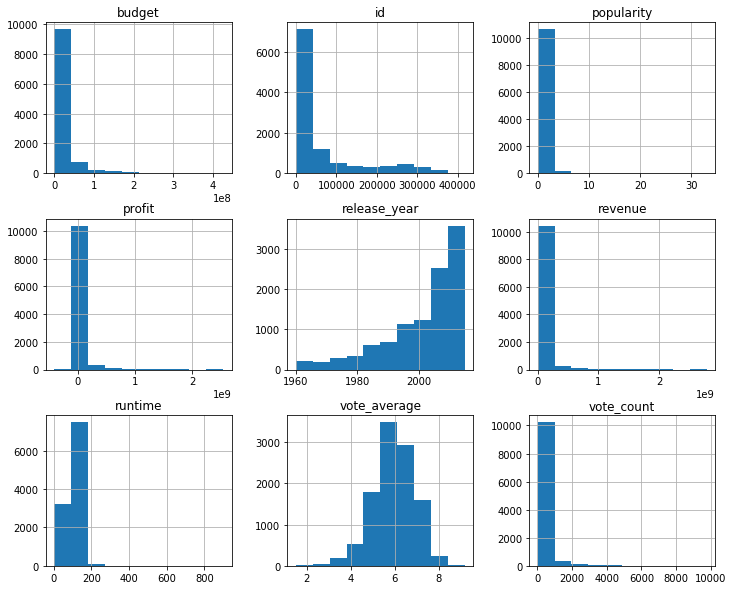

In [21]:
#hitogram for the whole dataframe
df.hist(figsize=(12,10));

conclusion : describe the whole dataframe


### Research Question 1 :what is the movie that achieved maximum profit?

In [22]:
#max profit movie
max_prof = df.profit.max()
max_prof_movie= df.query('profit==profit.max()').original_title
max_prof_movie

1386    Avatar
Name: original_title, dtype: object

conclusion : Avatar is the movie that achieved maximum profit


### Research Question  2:what is the number of movies for each year ?

Text(0,0.5,'Number of movies')

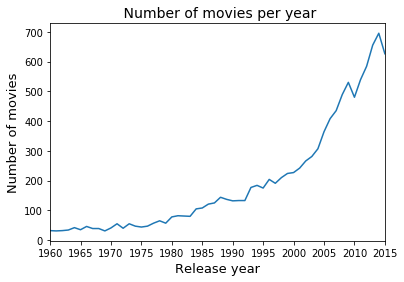

In [23]:
#number of movies for each year 
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
plt.title(" Number of movies per year",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number of movies',fontsize = 13)
#set the style sheet

conclusion : Maximum Number Of Movies Released In year 2014.


### Research Question 3:what are the top ten Movies that achieved profit?

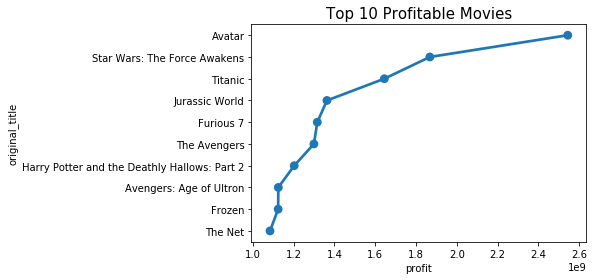

In [24]:
#top ten Movies with profit
top_tenMoviez_profit=df.nlargest(10,['profit'])

a = sns.pointplot(top_tenMoviez_profit.profit,top_tenMoviez_profit.original_title)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
a.set_title("Top 10 Profitable Movies",fontsize = 15)
sns.set_style("darkgrid")

conclusion : Avatar, Star Wars and Titanic are the most profitable movies.


### Research Question  4:what are the top ten movie with shorest and longest runtime?

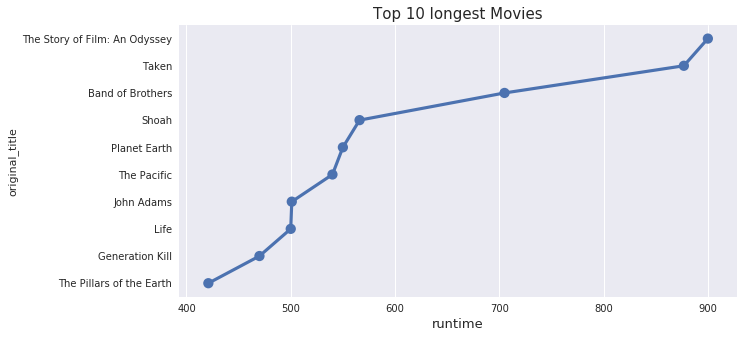

In [25]:
#top ten longest Movies and movie with shorest and longest runtime
top_ten_longest_Movies=df.nlargest(10,['runtime'])
a = sns.pointplot(top_ten_longest_Movies.runtime,top_ten_longest_Movies.original_title)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
a.set_title("Top 10 longest Movies",fontsize = 15)
a.set_xlabel("runtime",fontsize = 13)
sns.set_style("darkgrid")



conclusion : the story of film: an odyssey, taken and band of brothers are the longest movies.


### Research Question  5:what are the top ten budget films?

In [ ]:
#top ten Movies with revenue
top_tenMoviez_budget=df.nlargest(10,['budget'])
a = sns.pointplot(top_tenMoviez_budget.budget,top_tenMoviez_budget.original_title)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
a.set_title("Top 10 budget Movies",fontsize = 15)
sns.set_style("darkgrid")


conclusion : The Warrior's Way, Pirates of the Caribbean: On Stranger Tides and Avengers: Age of Ultron are the most budget movies.


### Research Question  6:what are the top ten revenue films? 

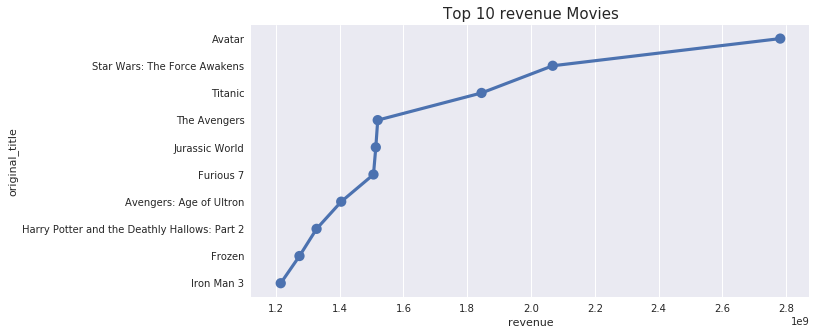

In [27]:
#top ten Movies with revenue
top_tenMoviez_revenue=df.nlargest(10,['revenue'])
a = sns.pointplot(top_tenMoviez_revenue.revenue,top_tenMoviez_revenue.original_title)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
a.set_title("Top 10 revenue Movies",fontsize = 15)
sns.set_style("darkgrid")

conclusion : Avatar, Star Wars and Titanic are the most revenue movies.

### Research Question  7:what are the top ten rated Movies?

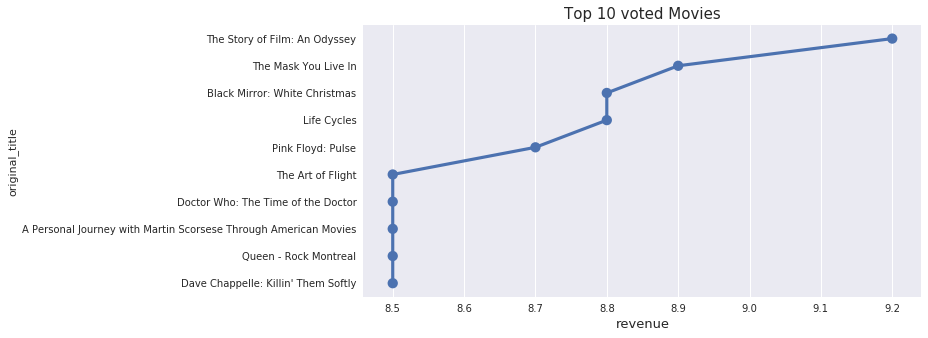

In [28]:
#top ten voted Movies
top_tenMoviez_voted=df.nlargest(10,['vote_average'])
a = sns.pointplot(top_tenMoviez_voted.vote_average,top_tenMoviez_voted.original_title)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
a.set_title("Top 10 voted Movies",fontsize = 15)
a.set_xlabel("revenue",fontsize = 13)
sns.set_style("darkgrid")


conclusion :The Story of Film: An Odyssey is the best rated movie

### Research Question  8:what are the top ten popular Movies?

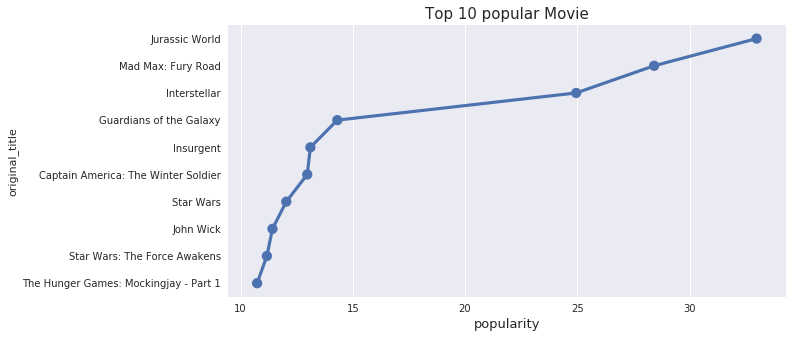

In [29]:
#top ten popular Movies
top_ten_popular_Movie=df.nlargest(10,['popularity'])
a = sns.pointplot(top_ten_popular_Movie.popularity,top_ten_popular_Movie.original_title)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
a.set_title("Top 10 popular Movie",fontsize = 15)
a.set_xlabel("popularity",fontsize = 13)
sns.set_style("darkgrid")


conclusion :Jurassic World is the most popular movie

### Research Question  9:top ten directors that directed the most number Movies?

Text(0,0.5,'Number Of Movies')

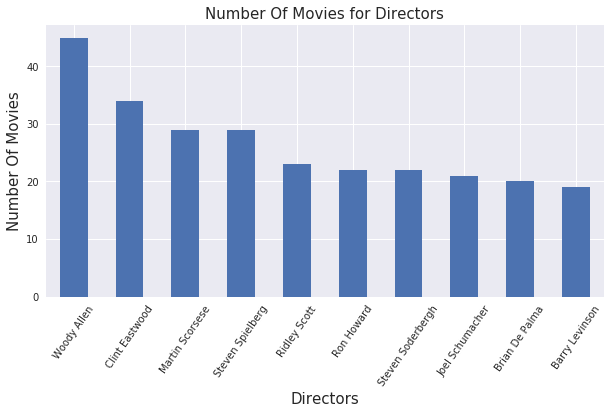

In [30]:
#top ten directors that directed the most number Movies
d=df.groupby('director').count()
top_ten_directors=d.nlargest(10,['id'])
top_ten_directors.id.plot(kind='bar')
plt.title("Number Of Movies for Directors",fontsize=15)
plt.xticks(rotation=55)
plt.xlabel('Directors',fontsize= 15)
plt.ylabel("Number Of Movies",fontsize= 15)

conclusion : woody allen director has the most number of movies

### Research Question  10:correlation between popularity and profit?

0.6288911661306993

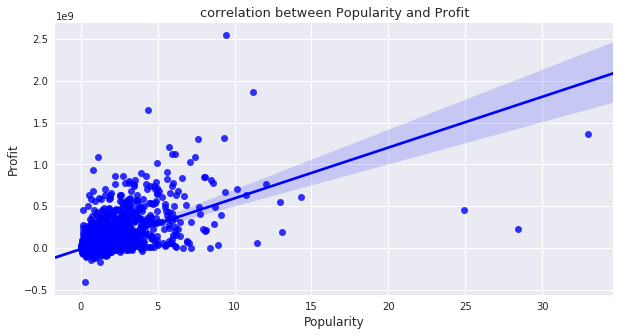

In [31]:
#correlation between popularity and profit
a = sns.regplot(x=df['popularity'],y=df['profit'],color='b')

#setup the title and the labels of the scatter plot.
a.set_title("correlation between Popularity and Profit",fontsize=13)
a.set_xlabel("Popularity",fontsize=12)
a.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")
#correlation between popularity and profit
df['popularity'].corr(df['profit'])

conclusion : there is positive correlation

### Research Question  12:average of runtime along time?

Text(0,0.5,'average of runtime')

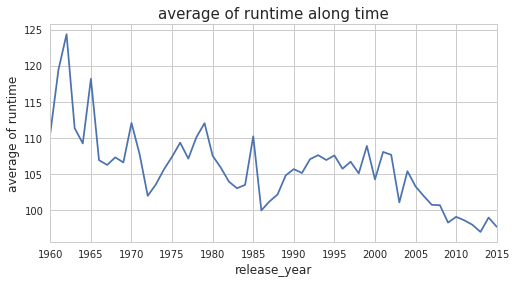

In [32]:
# average of runtime along time
df.groupby('release_year').runtime.mean().plot(xticks = np.arange(1960,2016,5));
plt.title("average of runtime along time",fontsize=15)
plt.xlabel('release_year',fontsize= 12)
plt.ylabel("average of runtime",fontsize= 12)

conclusion:Average runtime of the movies are decreasing year by year.


<a id='conclusions'></a>
## Conclusions

#### Maximum Number Of Movies Release In year 2014.
#### Avatar is the most profitable movie.
#### The Story of Film: An Odyssey has the longest runtime.
#### Average runtime of the movies are decreasing every year.
#### positiv correlation between popularity and profit.
#### Movies with higher profits have shown a corresponding increase in the popularity.

### Limitations
#### most  of rows have the budget or revenue zero values this will prevent us to calculate the actual revenue for each movie.
#### it will be better if the dataset contains  features like country , awards received
#### I did what I could in this business, but in the end, films that have high profit have high requirements of budget and hard work, but it pays off and its popularity. This is an example of what I found in analyzing this data, but it takes a lot of effort and fruitful work to get the best possible result.




In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0